# Import libraries and modules

In [2]:
import numpy as np
import math, random
import matplotlib.pyplot as plt

# Creating a dataset

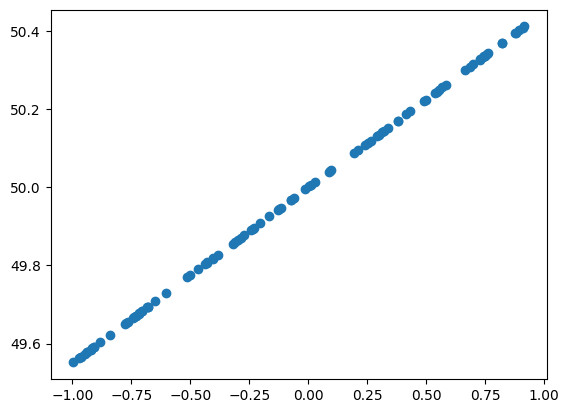

In [3]:
X = [random.uniform(-1, 1) for i in range(100)]
Y = [0.45 * x + 50 for x in X]

plt.scatter(X, Y)
plt.show()

# Gradient Descent - Univariate Linear Regression

In [4]:
w = 0
b = 0
learning_rate = 0.03

ws = []
bs = []
losses = []
gradient_ws = []
gradient_bs = []

### Online Gradient Descent

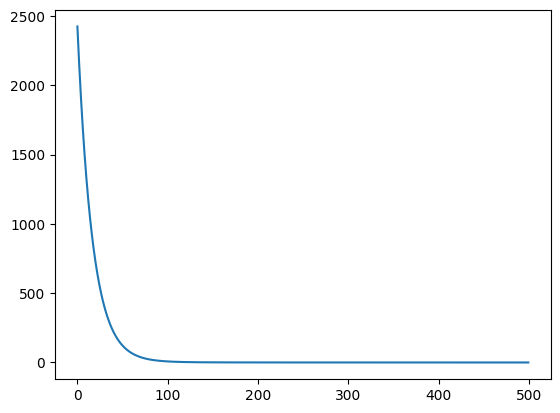

In [5]:
w = 0
b = 0
learning_rate = 0.03

ws = []
bs = []
losses = []
gradient_ws = []
gradient_bs = []

for epoch in range(500):
    y_hats = []
    for i in range(len(X)):
        y_hat = w * X[i] + b
        y_hats.append(y_hat)

        delta_w = (y_hat - Y[i]) * X[i]
        w -= (learning_rate * delta_w) / len(X)
        gradient_ws.append(delta_w)

        delta_b = y_hat - Y[i]
        b -= (learning_rate * delta_b) / len(X)
        gradient_bs.append(delta_b)

    loss = sum([(y_hats[i] - Y[i]) ** 2 for i in range(len(X))]) / len(X)
    losses.append(loss)

plt.plot(range(len(losses)), losses)
plt.show()

### Batch Gradient Descent

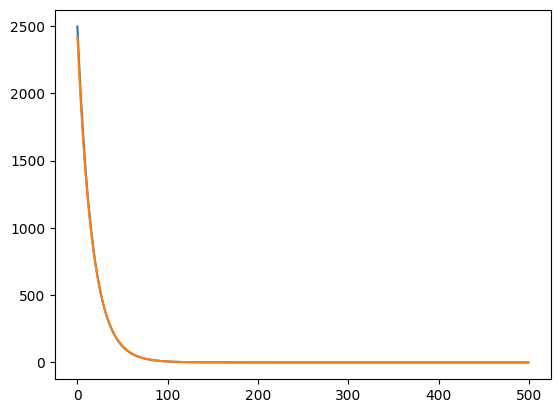

In [6]:
w = 0
b = 0
ws = []
bs = []
batch_losses = []
gradient_ws = []
gradient_bs = []

for epoch in range(500):
    y_hat = [w * x + b for x in X]
    d_w = 0
    d_b = 0

    for i in range(len(X)):
        d_w += (y_hat[i] - Y[i]) * X[i] / len(X)
        d_b += (y_hat[i] - Y[i]) / len(X)

    w -= learning_rate * d_w
    b -= learning_rate * d_b

    loss = sum([(y_hat[i] - Y[i]) ** 2 for i in range(len(X))]) / len(X)
    batch_losses.append(loss)

plt.plot(range(len(batch_losses)), batch_losses)
plt.plot(range(len(losses)), losses)
plt.show()

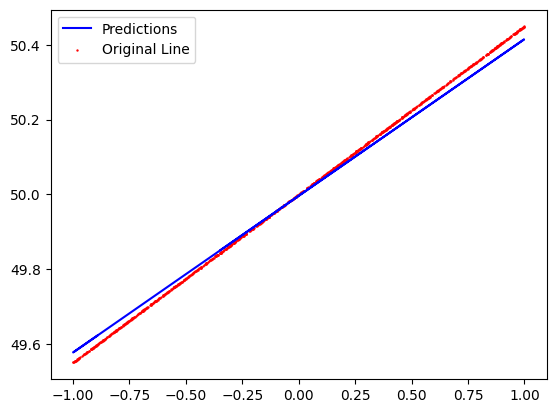

In [10]:
x_preds = [random.uniform(-1, 1) for _ in range(1000)]
preds = [w * x + b for x in x_preds]
# plt.scatter(x_preds, preds)
# add the original line. the original line in red, predictions in blue
true_line_x = [0.45 * x + 50 for x in x_preds]
plt.plot(x_preds, preds, color="blue", label="Predictions")
plt.scatter(x_preds, true_line_x, color="red", label="Original Line", s=0.5)
plt.legend()
plt.show()

# Gradient Descent - Multivariate Linear Regression

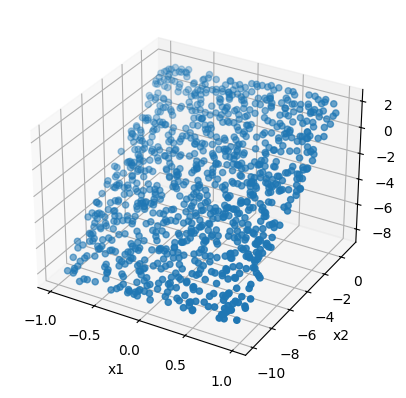

In [39]:
from mpl_toolkits.mplot3d import Axes3D

x1s = [random.uniform(-1, 1) for i in range(1000)]
x2s = [random.uniform(-10, 1) for i in range(1000)]
true_ys = [0.45 * x1 + 0.9 * x2 + 1 for x1, x2 in zip(x1s, x2s)]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x1s, x2s, true_ys)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("preds")

plt.show()

## Online Gradient Descent

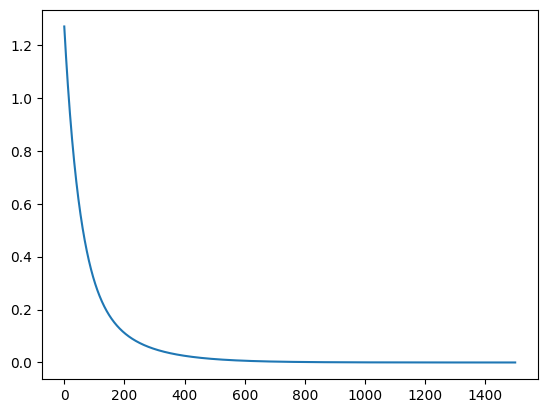

In [34]:
w1 = 0
w2 = 0
b = 0
learning_rate = 0.01
losses = []

for i in range(1500):
    for j in range(len(x1s)):
        y_hat = w1 * x1s[j] + w2 * x2s[j] + b

        delta_w1 = (y_hat - true_ys[j]) * x1s[j]
        delta_w2 = (y_hat - true_ys[j]) * x2s[j]
        delta_b = y_hat - true_ys[j]

        w1 -= learning_rate * delta_w1 / len(x1s)
        w2 -= learning_rate * delta_w2 / len(x1s)
        b -= learning_rate * delta_b / len(x1s)
    loss = sum(
        [(w1 * x1s[i] + w2 * x2s[i] + b - true_ys[i]) ** 2 for i in range(len(x1s))]
    ) / len(x1s)
    losses.append(loss)

plt.plot(range(len(losses)), losses)
plt.show()

## Batch Gradient Descent

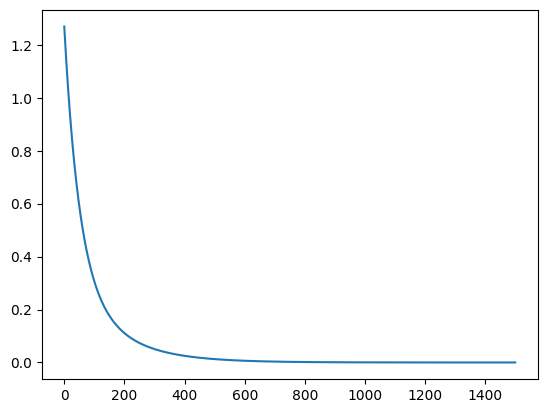

In [35]:
losses = []
w1 = 0
w2 = 0
b = 0
for i in range(1500):
    y_preds = [w1 * x1 + w2 * x2 + b for x1, x2 in zip(x1s, x2s)]
    delta_w1 = 0
    delta_w2 = 0
    delta_b = 0
    for x1, x2, y_true, y_pred in zip(x1s, x2s, true_ys, y_preds):
        delta_w1 += (y_pred - y_true) * x1
        delta_w2 += (y_pred - y_true) * x2
        delta_b += y_pred - y_true

    w1 -= learning_rate * delta_w1 / len(x1s)
    w2 -= learning_rate * delta_w2 / len(x1s)
    b -= learning_rate * delta_b / len(x1s)
    loss = sum(
        [(w1 * x1s[i] + w2 * x2s[i] + b - true_ys[i]) ** 2 for i in range(len(x1s))]
    ) / len(x1s)
    losses.append(loss)

plt.plot(range(len(losses)), losses)
plt.show()

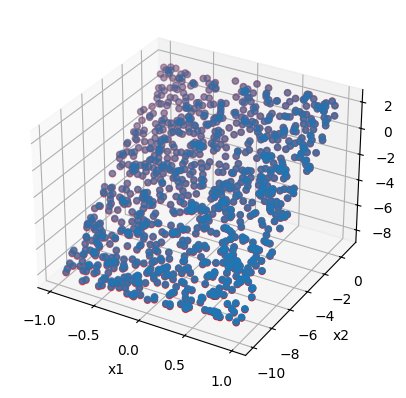

In [44]:
from mpl_toolkits.mplot3d import Axes3D

x_1s = [random.uniform(-1, 1) for _ in range(1000)]
x_2s = [random.uniform(-10, 1) for _ in range(1000)]
originals = [0.45 * x1 + 0.9 * x2 + 1 for x1, x2 in zip(x_1s, x_2s)]
preds = [w1 * x1 + w2 * x2 + b for x1, x2 in zip(x_1s, x_2s)]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_1s, x_2s, preds)
ax.scatter(x_1s, x_2s, originals, color="red")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("preds")

plt.show()

# Polynomial Linear Regression

Non polynomial

In [ ]:
x1s = [random.uniform(-1, 1) for i in range(1000)]
x2s = [random.uniform(-10, 1) for i in range(1000)]
true_ys = [0.45 * x1 + 0.9 * x2 + 1 for x1, x2 in zip(x1s, x2s)]

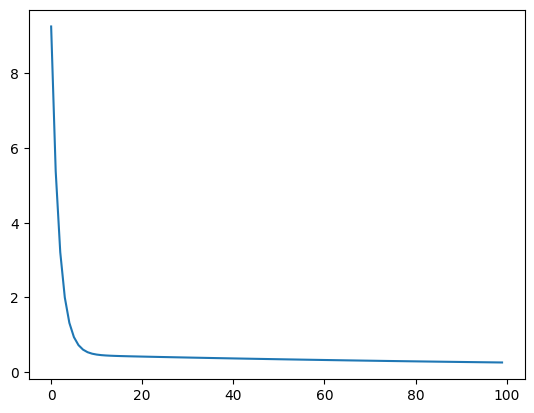

In [49]:
w1 = 0
w2 = 0

b = 0
learning_rate = 0.01
losses = []

for i in range(100):
    for j in range(len(x1s)):
        y_hat = w1 * x1s[j] ** 2 + w2 * x2s[j] + b

        delta_w1 = (y_hat - true_ys[j]) * x1s[j]
        delta_w2 = (y_hat - true_ys[j]) * x2s[j]
        delta_b = y_hat - true_ys[j]

        w1 -= learning_rate * delta_w1 / len(x1s)
        w2 -= learning_rate * delta_w2 / len(x1s)
        b -= learning_rate * delta_b / len(x1s)
    loss = sum(
        [
            (w1 * x1s[i] ** 2 + w2 * x2s[i] + b - true_ys[i]) ** 2
            for i in range(len(x1s))
        ]
    ) / len(x1s)
    losses.append(loss)

plt.plot(range(len(losses)), losses)
plt.show()

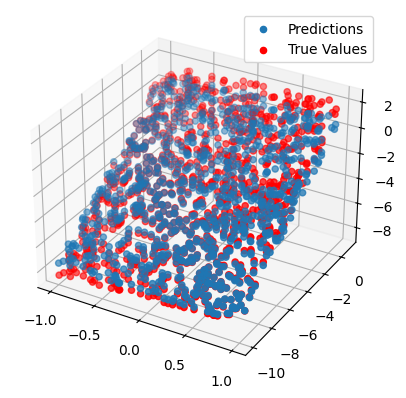

In [64]:
x1s = [random.uniform(-1, 1) for i in range(1000)]
x2s = [random.uniform(-10, 1) for i in range(1000)]
true_ys = [0.45 * x1 + 0.9 * x2 + 1 for x1, x2 in zip(x1s, x2s)]
preds = [w1 * x1**2 + w2 * x2 + b for x1, x2 in zip(x1s, x2s)]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    x1s,
    x2s,
    preds,
    label="Predictions",
)
ax.scatter(
    x1s,
    x2s,
    true_ys,
    color="red",
    label="True Values",
)

ax.legend()
plt.show()